# EDA on Soybean Yield from 1996-2019

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
soybeans = pd.read_csv('../dat/SOYBEANS-AcreageYieldProductionandPrice-2019-11-21.csv')

In [18]:
soybeans.columns

Index(['YEAR', 'LOCATION', 'STATE ANSI', 'ASD CODE', 'COUNTY ANSI',
       'REFERENCE PERIOD', 'COMMODITY', 'AREA HARVESTED in ACRES',
       'AREA PLANTED in ACRES', 'PRODUCTION in BU', 'YIELD in BU / ACRE',
       'PRODUCTION in $', 'PRICE RECEIVED in $ / BU'],
      dtype='object')

In [19]:
soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:
                   z.replace(' ','0'))
soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:                                                           
                           z.replace(',',''))
soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:                                                      
                           float(z))

soybeans['YIELD in BU / ACRE'] = soybeans['YIELD in BU / ACRE'].apply(lambda z:
                   z.replace(' ','0'))
soybeans['YIELD in BU / ACRE'] = soybeans['YIELD in BU / ACRE'].apply(lambda z:                                                           
                           z.replace(',',''))
soybeans['YIELD in BU / ACRE'] = soybeans['YIELD in BU / ACRE'].apply(lambda z:                                                      
                           float(z))



In [20]:
soybeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 13 columns):
YEAR                        1448 non-null int64
LOCATION                    1448 non-null object
STATE ANSI                  1448 non-null object
ASD CODE                    1448 non-null object
COUNTY ANSI                 1448 non-null object
REFERENCE PERIOD            1448 non-null object
COMMODITY                   1448 non-null object
AREA HARVESTED in ACRES     1448 non-null object
AREA PLANTED in ACRES       1448 non-null object
PRODUCTION in BU            1448 non-null float64
YIELD in BU / ACRE          1448 non-null float64
PRODUCTION in $             1448 non-null object
PRICE RECEIVED in $ / BU    1448 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 147.2+ KB


Text(0.5, 1.0, 'Total Bushels Produced By Year')

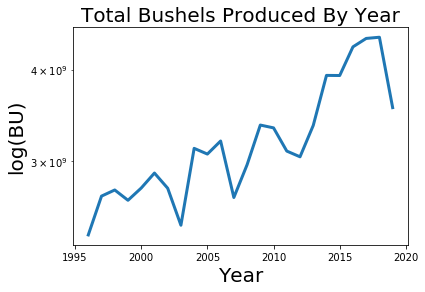

In [21]:
plt.plot(soybeans.groupby(['YEAR'])['PRODUCTION in BU'].sum(),linewidth=3)
plt.xlabel("Year",fontsize=20)
plt.ylabel("log(BU)",fontsize=20)
plt.yscale('log')
plt.title("Total Bushels Produced By Year",fontsize=20)

Text(0.5, 1.0, ' BU / ACRE vs. Year ')

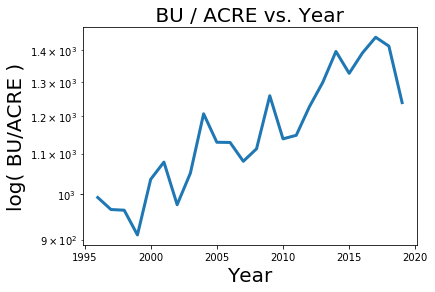

In [22]:
plt.plot(soybeans.groupby(['YEAR'])['YIELD in BU / ACRE'].sum(),linewidth=3)
plt.xlabel("Year",fontsize=20)
plt.ylabel("log( BU/ACRE )",fontsize=20)
plt.yscale('log')
plt.title(" BU / ACRE vs. Year ",fontsize=20)

Ok, we're seeing variation which is good, general increase which is good, and next is to determine how much each state contributes. 

In [23]:
soybeans.groupby("LOCATION")['PRODUCTION in BU'].sum().sort_values()

LOCATION
OTHER STATES      0.000000e+00
FLORIDA           1.612200e+07
WEST VIRGINIA     1.679000e+07
NEW JERSEY        8.158900e+07
TEXAS             1.284080e+08
DELAWARE          1.600140e+08
GEORGIA           1.697680e+08
OKLAHOMA          2.103630e+08
NEW YORK          2.136870e+08
ALABAMA           2.375350e+08
SOUTH CAROLINA    2.701630e+08
VIRGINIA          4.395950e+08
MARYLAND          4.417460e+08
PENNSYLVANIA      4.771900e+08
LOUISIANA         9.432760e+08
NORTH CAROLINA    1.130660e+09
TENNESSEE         1.208210e+09
KENTUCKY          1.448005e+09
WISCONSIN         1.645195e+09
MISSISSIPPI       1.713945e+09
MICHIGAN          1.918660e+09
KANSAS            2.791110e+09
ARKANSAS          2.902475e+09
NORTH DAKOTA      2.957630e+09
SOUTH DAKOTA      3.881915e+09
MISSOURI          4.768860e+09
OHIO              4.954445e+09
NEBRASKA          5.597735e+09
INDIANA           6.233335e+09
MINNESOTA         7.164270e+09
ILLINOIS          1.135806e+10
IOWA              1.160408e+10

# Top States

    All of them!!
    

# Conclusion: The yield both in terms of total bushels and then as bushels per acre follows a trend, and exhibits high autocorrelation. Evidence below. 

In [24]:
soybeans.groupby(['YEAR'])['YIELD in BU / ACRE'].sum().autocorr()

0.8471769766179168

In [25]:
soybeans.groupby(['YEAR'])['PRODUCTION in BU'].sum().autocorr()

0.8376708612811471

# Next up, state by state correlations. 

In [26]:
soybeans.groupby(['YEAR','LOCATION'])['PRODUCTION in BU'].sum().autocorr()

0.2812716557481746

In [29]:
soybeans.groupby(['LOCATION','YEAR'])['PRODUCTION in BU'].sum().autocorr()

for group, g in soybeans.groupby(['LOCATION']):
    print(g['LOCATION'].values[0])
    print(g['PRODUCTION in BU'].sum().autocorr())

ALABAMA


AttributeError: 'numpy.float64' object has no attribute 'autocorr'

State yields are highly correlated to it's own state, which is good as far as predicting each state individually, but predicting yield based on the outcome of previous states is not. 

# Next up. Collect new features!

In [62]:
soybean_yield.head()

,YEAR,LOCATION,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,AREA HARVESTED in ACRES,AREA PLANTED in ACRES,PRODUCTION in BU,YIELD in BU / ACRE,PRODUCTION in $,PRICE RECEIVED in $ / BU
0,1996,ALABAMA,01,,,YEAR,SOYBEANS,"305,000","320,000","10,370,000",34,"76,738,000",
1,1996,ALABAMA,01,,,MARKETING YEAR,SOYBEANS,,,,,,7.4
2,1996,ARKANSAS,05,,,YEAR,SOYBEANS,"3,500,000","3,550,000","112,000,000",32,"824,320,000",
3,1996,ARKANSAS,05,,,MARKETING YEAR,SOYBEANS,,,,,,7.36
4,1996,DELAWARE,10,,,YEAR,SOYBEANS,"217,000","220,000","7,595,000",35,"54,684,000",


# Goal is to merge with this dataset. How do we do that? Convert the other collected features into a panel format merged on YEAR and LOCATION